# Imports
---

In [13]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style
import time
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
from tqdm import tqdm

In [2]:
%matplotlib inline
style.use('seaborn')
rcParams['figure.figsize'] = [14,7]
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [18]:
api_key = ''

In [3]:
sp500 = pd.read_csv('S&P 500 Companies.csv')
sp500['CIK'] = sp500['CIK'].apply(lambda x: '{0:0>10}'.format(x))
sp500.iloc[81,0] = 'BF-B' # need to change BF.B to BF-B for AlphaVantage
sp500.head()

,Symbol,Company Name,GICS Sector,GICS Sub Industry,HQ Location,Date First Added,CIK
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",3/31/1964,0000001800
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012,0001551152
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",5/31/2018,0000815094
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",7/6/2011,0001467373


In [4]:
tickers = sp500.loc[:,'Symbol']
tickers

0       MMM
1       ABT
2      ABBV
3      ABMD
4       ACN
       ... 
500     YUM
501    ZBRA
502     ZBH
503    ZION
504     ZTS
Name: Symbol, Length: 505, dtype: object

In [ ]:
# prices = []
# for ticker in sp500['Symbol']:
#     prices.append(web.DataReader(ticker, 'av-daily', api_key = api_key)) #receives daily, unadjusted stock prices
#     time.sleep(10) # can only make 5 API calls per minute, can do 10 seconds because API call takes 2-4 seconds

# data_dict = dict(zip(sp500['Symbol'], prices))

# for ticker, price_info in data_dict.items():
#     price_info.to_csv('S&P 500 Stock Prices CSV/'+ticker+'.csv')

In [ ]:
# for ticker, price_info in data_dict.items():
#     price_info.to_excel('S&P 500 Stock Prices Excel/'+ticker+'.xlsx')

---

In [5]:
# prices_adj = []
# for ticker in tqdm(sp500['Symbol']):
#     prices_adj.append(web.DataReader(ticker, 'av-daily-adjusted', api_key = api_key)) #receives daily, unadjusted stock prices
#     time.sleep(10) # can only make 5 API calls per minute

# data_dict_adj = dict(zip(sp500['Symbol'], prices_adj))

# for ticker, price_info in tqdm(data_dict_adj.items()):
#     price_info.to_csv('S&P 500 Stock Prices Adjusted CSV/'+ticker+'.csv')

100%|██████████| 505/505 [00:29<00:00, 17.00it/s]


---

In [5]:
prices = []
for ticker in tickers:
    prices.append(pd.read_csv('S&P 500 Stock Prices Adjusted CSV/'+ticker+'.csv', index_col = 0))

In [6]:
data_dict_adj = dict(zip(sp500['Symbol'], prices))

In [7]:
close_list = []
for k,v in data_dict_adj.items():
    close_list.append(v['adjusted close'])
close_prices = pd.DataFrame(close_list).T
close_prices.columns = sp500['Symbol']

In [8]:
sectors = sp500['GICS Sector'].unique()
sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

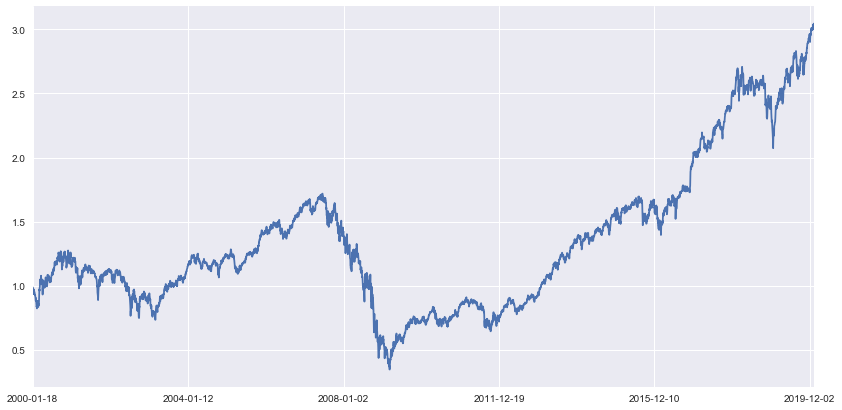

In [9]:
financials = sp500[sp500['GICS Sector']=='Financials'].loc[:,'Symbol'].values
temp = close_prices.loc[:,financials].fillna(0).sum(axis = 1)
temp = temp / temp.shift()
temp.cumprod().plot();

In [39]:
sector_returns = []
sector_prices = []
for sector in sectors:
    sector_names = sp500[sp500['GICS Sector']==sector].loc[:,'Symbol'].values
    temp = close_prices.loc[:,sector_names].fillna(0).sum(axis = 1)
    sector_prices.append(temp)
    temp = (temp / temp.shift()).cumprod()
    temp.dropna(inplace = True)
    sector_returns.append(temp)

In [40]:
sector_prices = pd.DataFrame(sector_prices).T
sector_prices.columns = sectors
sector_prices.index = pd.to_datetime(sector_prices.index)
# sector_prices.head()

In [41]:
sector_returns = pd.DataFrame(sector_returns).T
sector_returns.columns = sectors
sector_returns.index = pd.to_datetime(sector_returns.index)
sector_returns

,Industrials,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,Energy
2000-01-19,0.997581,1.008957,1.011257,1.007780,1.025556,1.012876,0.986396,0.982087,0.999935,0.995291,1.005306
2000-01-20,0.981348,1.001461,1.029458,0.993558,1.012196,1.012697,0.969481,0.953725,1.004365,0.982574,0.996422
2000-01-21,0.977380,1.025568,1.060744,0.985363,1.006646,1.036075,0.953217,0.951073,1.014244,0.966360,1.024084
2000-01-24,0.955127,0.994160,1.023579,0.972645,0.978745,1.039833,0.935740,0.940588,1.017581,0.935339,1.000831
2000-01-25,0.942568,0.989757,1.049136,0.978187,0.992149,1.013986,0.941861,0.927251,1.018387,0.933281,0.995789
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,11.283544,12.312681,5.278945,21.870914,13.956305,8.454204,3.011916,9.320933,13.519345,6.788982,7.826759
2020-01-07,11.282458,12.294323,5.298317,21.852333,13.964553,8.440018,3.001680,9.296017,13.355018,6.733563,7.862410
2020-01-08,11.321126,12.387300,5.334520,22.023518,13.950778,8.438040,3.012926,9.343777,13.414346,6.770677,7.694438
2020-01-09,11.398697,12.462709,5.375610,22.181076,13.955327,8.485534,3.043300,9.377861,13.435654,6.806309,7.754219


In [71]:
sector_returns['2019':].iplot(kind = 'box')

Notice that Communication Services has the highest cumulative returns due to reclassification of Google, Facebook, etc... from Tech to Communication around 2018. Would need to adjust reclassification of company sectors in order to get accurate measure, but I do not have the data.

In [14]:
sp500[sp500['GICS Sector']=='Communication Services'].loc[:,'Symbol'].values

array(['ATVI', 'GOOGL', 'GOOG', 'T', 'CTL', 'CHTR', 'CMCSA', 'DISCA',
       'DISCK', 'DISH', 'EA', 'FB', 'FOXA', 'FOX', 'IPG', 'LYV', 'NFLX',
       'NWSA', 'NWS', 'OMC', 'TMUS', 'TTWO', 'TWTR', 'VZ', 'VIAC', 'DIS'],
      dtype=object)

In [15]:
sector_prices.tail()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,Energy
2020-01-06,9753.8680,10982.1300,9289.8645,4958.0968,15043.4538,2243.7450,7459.9240,3060.1200,3779.1746,3031.5628,1582.850
2020-01-07,9752.9293,10965.7550,9323.9550,4953.8845,15052.3438,2239.9800,7434.5723,3051.9400,3733.2389,3006.8159,1590.060
2020-01-08,9786.3553,11048.6850,9387.6649,4992.6918,15037.4958,2239.4550,7462.4263,3067.6200,3749.8234,3023.3890,1556.090
2020-01-09,9853.4100,11115.9450,9459.9750,5028.4100,15042.4000,2252.0600,7537.6550,3078.8100,3755.7800,3039.3000,1568.180
2020-01-10,9832.0502,11180.3555,9446.7439,5041.7557,15056.6273,2260.3532,7505.2520,3082.3835,3789.7496,3046.0411,1562.826


In [53]:
# SPY = web.DataReader('SPY', 'av-daily-adjusted', start = '2000-01-18', end = '2020-01-10', api_key = api_key)
SPY = pd.read_csv('S&P 500 Stock Prices Adjusted CSV/SPY.csv', index_col = 0, header = 0)
SPY.index = pd.to_datetime(SPY.index)
SPY.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2000-01-18,145.3437,146.6250,145.1875,145.8125,100.2184,6488500,0.0,1.0
2000-01-19,145.3125,147.0000,145.0000,147.0000,101.0346,6157900,0.0,1.0
2000-01-20,146.9687,146.9687,143.8125,144.7500,99.4882,5800100,0.0,1.0
2000-01-21,145.5000,145.5000,144.0625,144.4375,99.2734,6244800,0.0,1.0
2000-01-24,145.6562,145.8437,139.4062,140.3437,96.4597,7896900,0.0,1.0


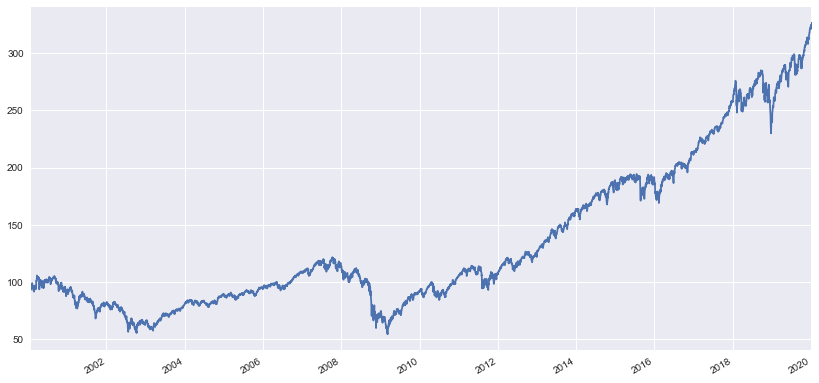

In [28]:
SPY['adjusted close'].plot();

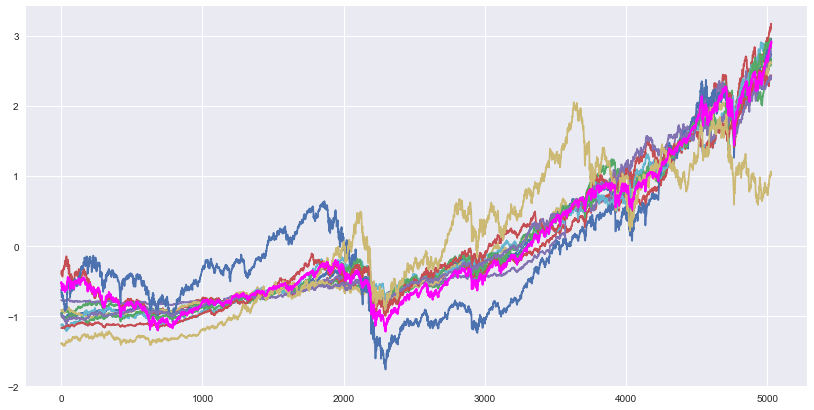

In [29]:
fig, ax = plt.subplots()

sectors_normed = (sector_prices - sector_prices.mean()) / sector_prices.std()
spy_normed = (SPY['adjusted close'] - SPY['adjusted close'].mean()) / SPY['adjusted close'].std()

ax.plot(sectors_normed.values)
ax.plot(spy_normed.values, color = 'magenta', lw = 2.0)

In [29]:
from sklearn.linear_model import LinearRegression

In [49]:
sector_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2000-01-18 to 2020-01-10
Data columns (total 11 columns):
Industrials               5028 non-null float64
Health Care               5028 non-null float64
Information Technology    5028 non-null float64
Communication Services    5028 non-null float64
Consumer Discretionary    5028 non-null float64
Utilities                 5028 non-null float64
Financials                5028 non-null float64
Materials                 5028 non-null float64
Real Estate               5028 non-null float64
Consumer Staples          5028 non-null float64
Energy                    5028 non-null float64
dtypes: float64(11)
memory usage: 631.4 KB


In [54]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5028 entries, 2000-01-18 to 2020-01-10
Data columns (total 8 columns):
open                 5028 non-null float64
high                 5028 non-null float64
low                  5028 non-null float64
close                5028 non-null float64
adjusted close       5028 non-null float64
volume               5028 non-null int64
dividend amount      5028 non-null float64
split coefficient    5028 non-null float64
dtypes: float64(7), int64(1)
memory usage: 353.5 KB


In [55]:
betas_ = []
for sector in sectors:
    X = np.reshape(sector_prices[sector].pct_change().dropna().values, (5027,1))
    y = np.reshape(SPY['adjusted close'].pct_change().dropna().values, (5027,1))
    reg = LinearRegression().fit(X, y)
    betas_.append(reg.coef_)

In [56]:
betas = []
for i in range(len(betas_)):
    betas.append(betas_[i][0])

In [57]:
betas = pd.DataFrame(betas, index = sectors)
betas.columns = ['Betas']
betas

,Betas
Industrials,0.814690
Health Care,0.792295
Information Technology,0.543671
Communication Services,0.536302
Consumer Discretionary,0.614736
Utilities,0.620026
Financials,0.610668
Materials,0.674395
Real Estate,0.511982
Consumer Staples,0.977746


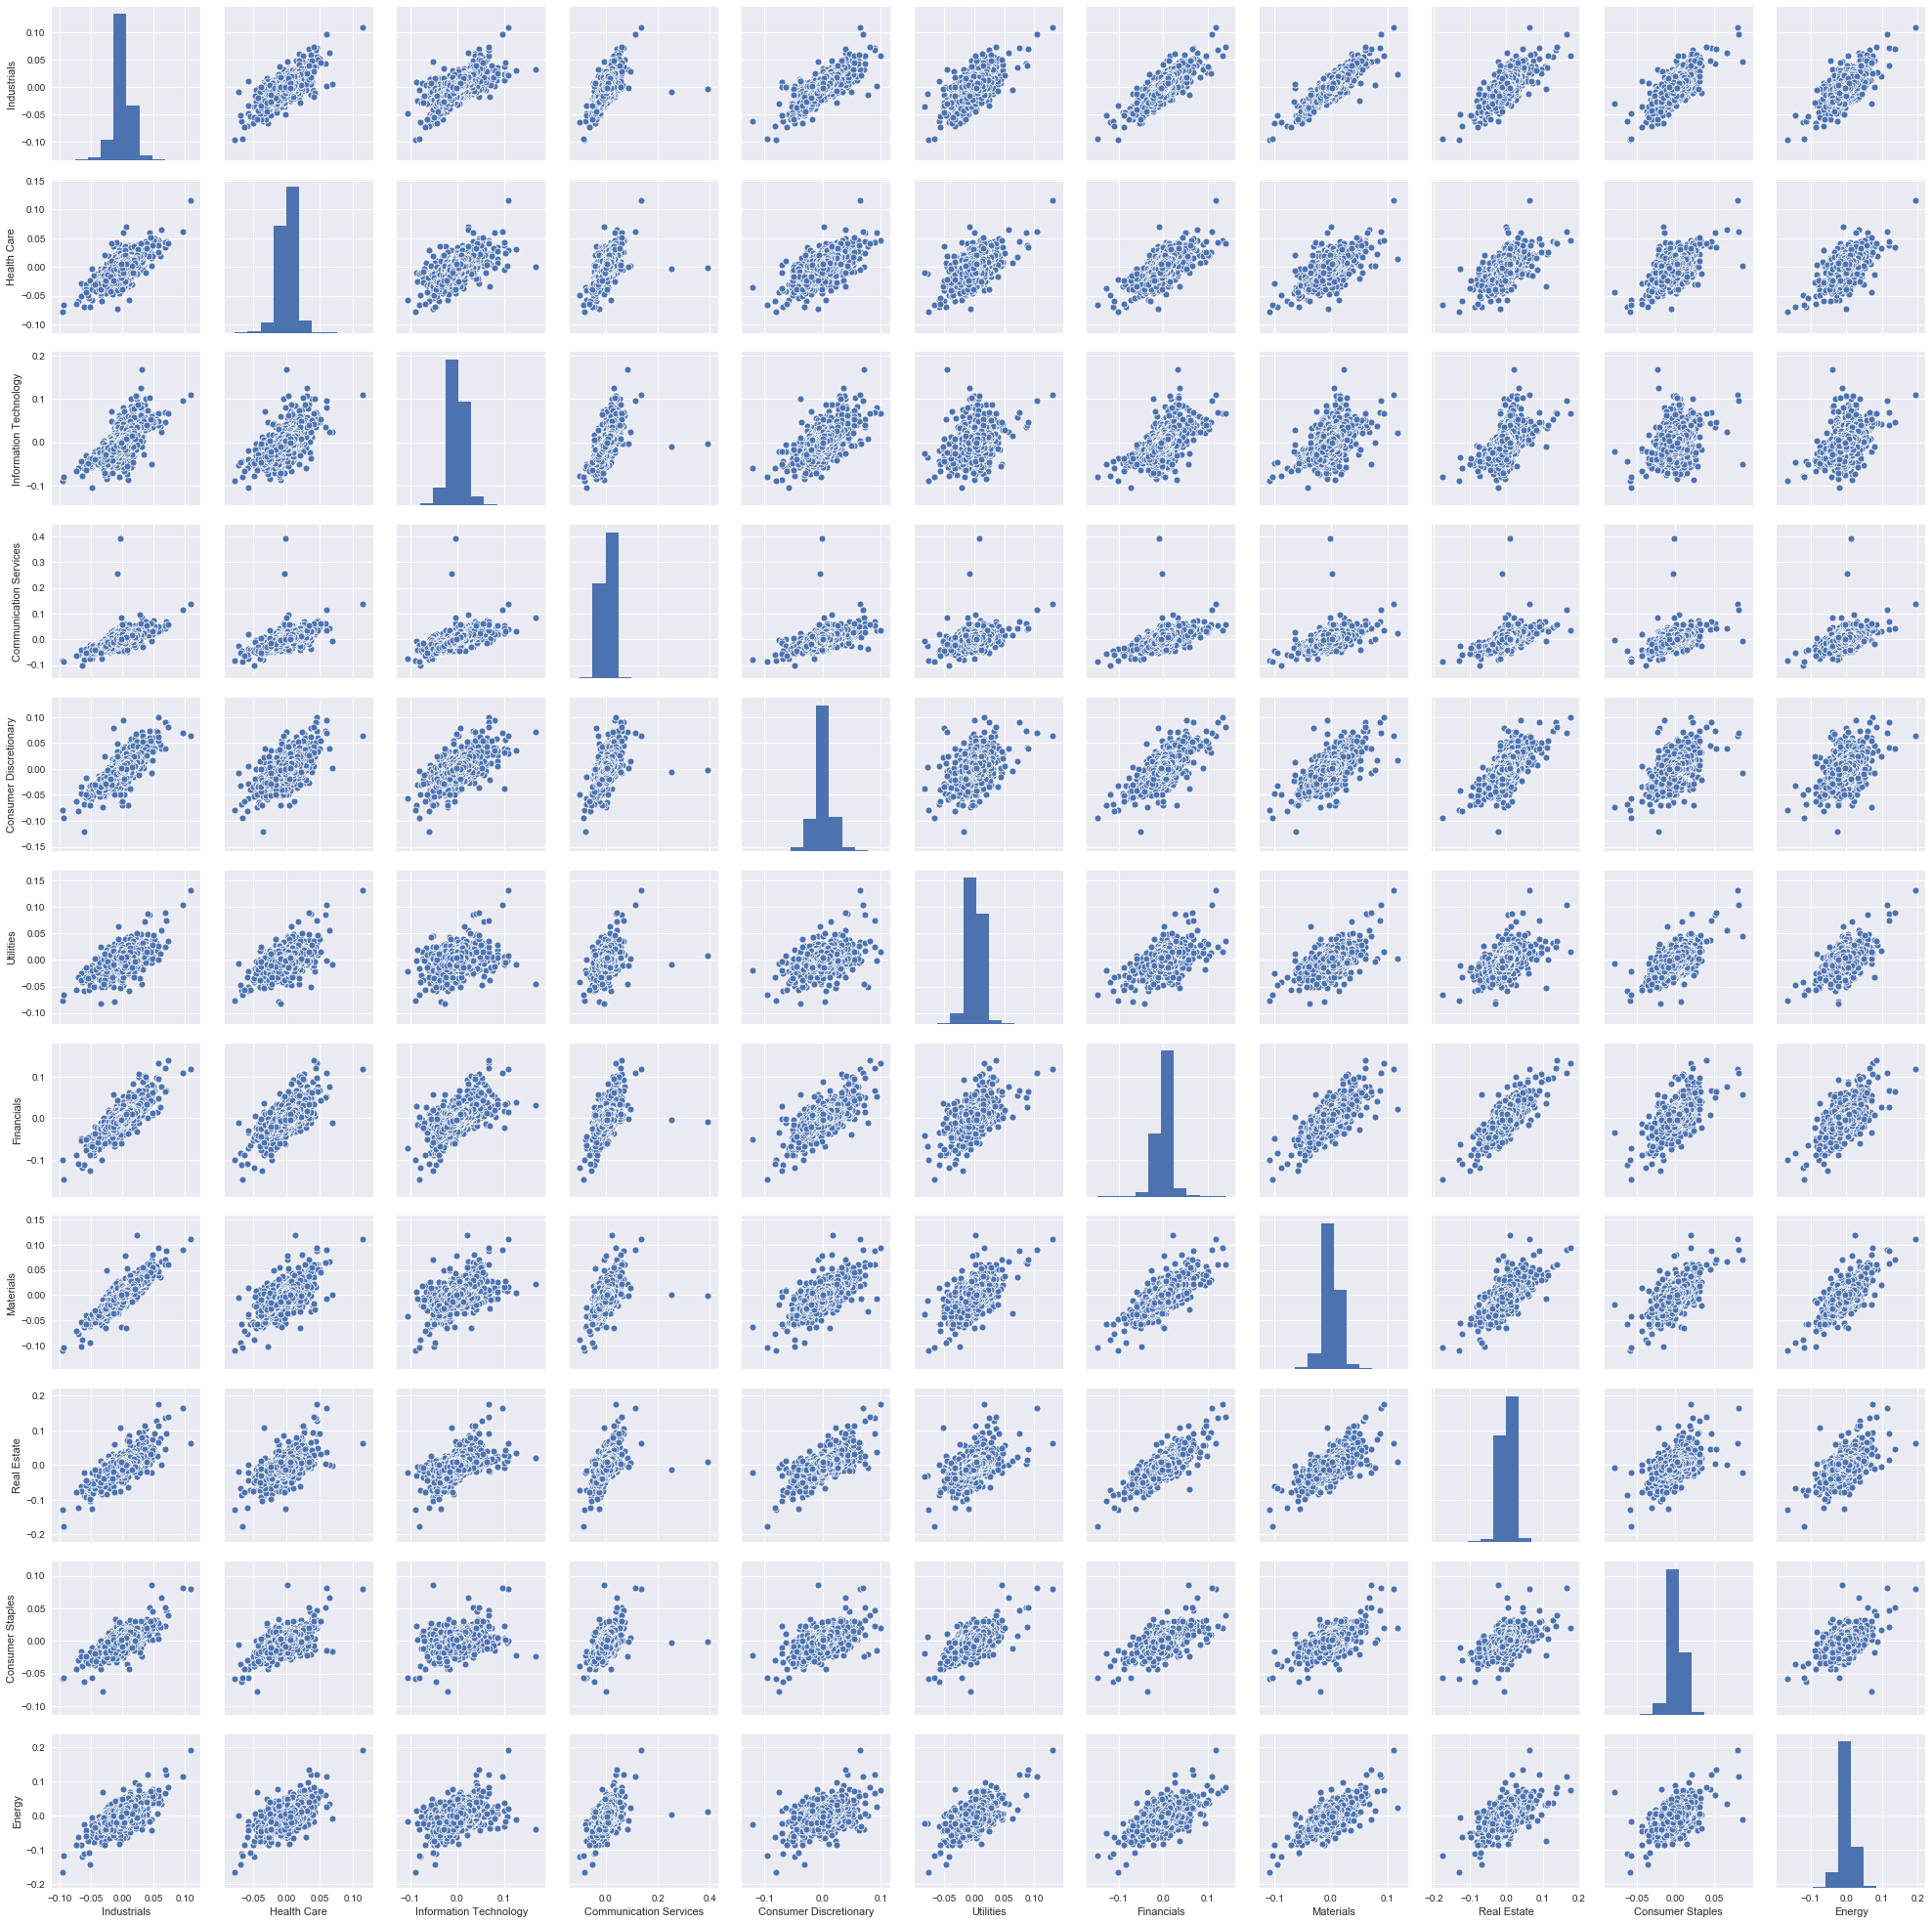

In [35]:
sns.pairplot(sector_prices.pct_change().dropna())

In [36]:
sector_prices.pct_change().corr()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,Energy
Industrials,1.000000,0.749567,0.725601,0.666766,0.781760,0.550889,0.819252,0.863711,0.687742,0.708995,0.651589
Health Care,0.749567,1.000000,0.684081,0.610415,0.664001,0.486270,0.681607,0.661514,0.567261,0.633057,0.538441
Information Technology,0.725601,0.684081,1.000000,0.659689,0.687299,0.362783,0.643389,0.600673,0.546579,0.460142,0.457014
Communication Services,0.666766,0.610415,0.659689,1.000000,0.612485,0.398709,0.616547,0.590263,0.521877,0.504492,0.471224
Consumer Discretionary,0.781760,0.664001,0.687299,0.612485,1.000000,0.415320,0.721306,0.696986,0.648571,0.603679,0.470285
Utilities,0.550889,0.486270,0.362783,0.398709,0.415320,1.000000,0.501752,0.519023,0.507818,0.613060,0.494134
Financials,0.819252,0.681607,0.643389,0.616547,0.721306,0.501752,1.000000,0.736824,0.728036,0.646220,0.553008
Materials,0.863711,0.661514,0.600673,0.590263,0.696986,0.519023,0.736824,1.000000,0.642316,0.654454,0.683693
Real Estate,0.687742,0.567261,0.546579,0.521877,0.648571,0.507818,0.728036,0.642316,1.000000,0.540370,0.479889
Consumer Staples,0.708995,0.633057,0.460142,0.504492,0.603679,0.613060,0.646220,0.654454,0.540370,1.000000,0.457134


In [67]:
returns = sector_prices.pct_change().dropna()
returns.head()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Consumer Staples,Energy
2000-01-19,-0.002419,0.008957,0.011257,0.007780,0.025556,0.012876,-0.013604,-0.017913,-0.000065,-0.004709,0.005306
2000-01-20,-0.016272,-0.007430,0.017998,-0.014113,-0.013027,-0.000177,-0.017148,-0.028879,0.004430,-0.012777,-0.008838
2000-01-21,-0.004044,0.024072,0.030390,-0.008248,-0.005483,0.023084,-0.016776,-0.002781,0.009836,-0.016501,0.027762
2000-01-24,-0.022768,-0.030625,-0.035036,-0.012907,-0.027717,0.003628,-0.018335,-0.011024,0.003290,-0.032101,-0.022707
2000-01-25,-0.013148,-0.004429,0.024968,0.005698,0.013695,-0.024857,0.006542,-0.014179,0.000792,-0.002200,-0.005038


In [69]:
cpi = pd.read_csv('Gov Data/CPI.csv', index_col = 0)
cpi.index = pd.to_datetime(cpi.index)
cpi.head()

,CPIAUCNS
DATE,
1913-01-01,9.8
1913-02-01,9.8
1913-03-01,9.8
1913-04-01,9.8
1913-05-01,9.7


In [71]:
gdp = pd.read_csv('Gov Data/RealGDP.csv', index_col = 0)
gdp.index = pd.to_datetime(gdp.index)
gdp.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


In [72]:
fedfunds = pd.read_csv('Gov Data/FedFunds.csv', index_col = 0)
fedfunds.index = pd.to_datetime(fedfunds.index)
fedfunds.head()

,DFF
DATE,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88


In [79]:
unem_rate = pd.read_csv('Gov Data/UnemploymentRate.csv', index_col = 0) / 100
unem_rate.index = pd.to_datetime(unem_rate.index)
unem_rate.head()

,UNRATE
DATE,
1948-01-01,0.034
1948-02-01,0.038
1948-03-01,0.040
1948-04-01,0.039
1948-05-01,0.035


In [101]:
gov_data = fedfunds.join(cpi).join(gdp).join(unem_rate).dropna()
gov_data.columns = ['FedFunds', 'CPI', 'RealGDP', 'Unem']
gov_data.head()

,FedFunds,CPI,RealGDP,Unem
DATE,,,,
1954-07-01,1.13,26.9,2682.601,0.058
1954-10-01,0.50,26.8,2735.091,0.057
1955-01-01,1.44,26.7,2813.212,0.049
1955-04-01,1.44,26.7,2858.988,0.047
1955-07-01,1.69,26.8,2897.598,0.040
